In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
df = pd.read_csv('dataset/data_merged.csv')
mean_popularity = 50
df["popularity"] = [ 1 if i >= mean_popularity else 0 for i in df.popularity ]

In [3]:
df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,...,valence_yr,popularity_yr,mode,key_0_yr,key_1_yr,key_2_yr,key_3_yr,key_4_yr,key_5_yr,key_6_yr
0,0.0131,0.2560,182347,0.895,0,0.000106,0.0821,-4.860,0,0.0707,...,0.583424,35.272231,1,0,0,1,0,0,0,0
1,0.9800,0.2770,206972,0.145,0,0.879000,0.1110,-19.898,0,0.0845,...,0.432251,3.672500,1,1,0,0,0,0,0,0
2,0.7950,0.6850,314667,0.483,0,0.878000,0.1130,-10.202,0,0.0337,...,0.447291,7.707000,1,0,0,0,1,0,0,0
3,0.6560,0.7880,179747,0.808,0,0.000000,0.1540,-6.590,0,0.0395,...,0.447291,7.707000,1,0,0,0,1,0,0,0
4,0.3020,0.0753,498560,0.150,0,0.884000,0.1210,-16.705,0,0.0371,...,0.443625,3.419500,1,1,0,0,0,0,0,0


In [4]:
X  = df.drop(['popularity'], axis=1)
y = df['popularity']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [9]:
X_train.shape, X_test.shape

((137784, 71), (34446, 71))

In [10]:
criterion = ['gini', 'entropy']
# max_depth = [2,5,10,15]
# min_samples_split = [2,3,4,6,10,15]

# max_depth = [10,12,15]
# min_samples_split = [6,10,15]

# max_depth = [8,10,12]
# min_samples_split = [8,10,12]
# min_samples_leaf=[1,2,3,4]

max_depth = [8,10,12]
min_samples_split = [8,10,12]
min_samples_leaf=[1,2,3,4]


In [11]:
parameters = dict(max_depth=max_depth,
                 min_samples_split=min_samples_split,
                 min_samples_leaf=min_samples_leaf)

In [12]:
tree_clf = DecisionTreeClassifier()
# tree_clf.fit(X_train,y_train)

In [13]:
tree_clf_gs = GridSearchCV(tree_clf, parameters)
tree_clf_gs.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 10, 12],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [8, 10, 12]})

In [14]:
# print('Best Criterion:', tree_clf_gs.best_estimator_.get_params()['criterion'])
print('Best max_depth:', tree_clf_gs.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', tree_clf_gs.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', tree_clf_gs.best_estimator_.get_params()['min_samples_leaf'])
# print(); 
# print(clf_GS.best_estimator_.get_params()['dec_tree'])


Best max_depth: 8
Best min_samples_split: 12
Best min_samples_leaf: 4


In [15]:
X_train.columns[2]

'duration_ms'

In [16]:
f = open("iris_tree.dot", "w")
export_graphviz(
    tree_clf,
    out_file=f,
    feature_names=X_train.columns,
    class_names=[y_train.name],
    rounded=True,
    filled=True
)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [17]:
%%time
tree_clf = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=8, min_samples_leaf=2)
tree_clf.fit(X_train,y_train)

CPU times: user 2.67 s, sys: 69.7 ms, total: 2.74 s
Wall time: 2.77 s


DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2,
                       min_samples_split=8)

In [ ]:
tree.plot_tree(tree_clf)

In [18]:
y_pred = tree_clf.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred)

0.9198165244150264

In [20]:
y_pred_train = tree_clf.predict(X_train)

In [21]:
accuracy_score(y_pred_train, y_train)

0.9211011438193114

In [53]:
print(tree_clf.tree_.max_depth)

41


In [22]:
print(confusion_matrix(y_test, y_pred))
print("Classification report\n")
print(classification_report(y_test, y_pred))

[[27933   779]
 [ 1983  3751]]
Classification report

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     28712
           1       0.83      0.65      0.73      5734

    accuracy                           0.92     34446
   macro avg       0.88      0.81      0.84     34446
weighted avg       0.92      0.92      0.92     34446



In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
# predict probabilities
lr_probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
lr_auc

0.9380958801809155

Best Threshold=0.187500, G-Mean=0.853


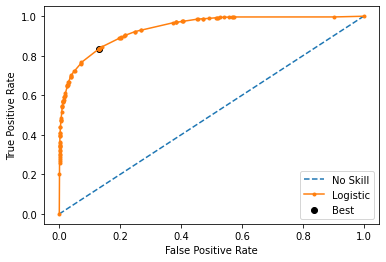

In [29]:
from matplotlib import pyplot
from numpy import sqrt, argmax, save
import numpy as np
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

SVM: f1=0.731 auc=0.824
Best Threshold=0.360731, F-Score=0.739
0.16646345003774024


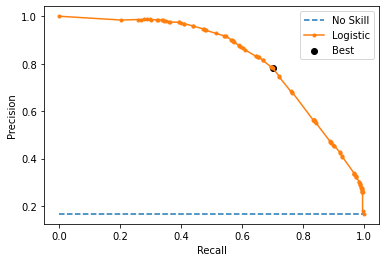

In [32]:
from sklearn.metrics import auc, precision_recall_curve, f1_score
from matplotlib import pyplot
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('SVM: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# convert to f score
fscore = (2 * lr_precision * lr_recall) / (lr_precision + lr_recall)
# locate the index of the largest f 
from numpy import argmax
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
print(no_skill)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
pyplot.scatter(lr_recall[ix], lr_precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()